<a href="https://colab.research.google.com/github/1kruidenp/PRA3024/blob/master/Week1_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Population with antibodies: 4935
Population of Positive people tested positive: 4899
Population of Positive people tested negative: 36
Population of Negative people tested negative: 470361
Population of Negative people tested positive: 24704
Percentage of people tested positive actually being positive: 16.548998412323076
Percentage of people tested negative actually being negative: 99.99234688996741




Text(0, 0.5, 'Percentage of people tested positive actually tested positive')

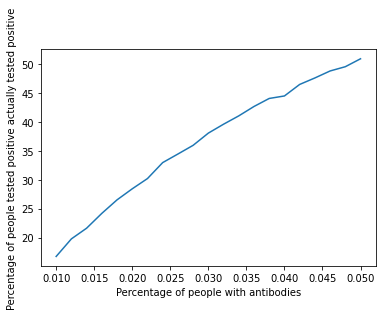

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Percentage of population having antibodies
Per_Anti=0.01
#Number of population we will be testing
Population=500000
#Percentage of positive test being real positive
Per_PTP=0.99
#Percentage of positive test being false negative
Per_PTN=0.01
#Percentage of negative test being real negative
Per_NTN=0.95
#Percentage of negative test being fake positive
Per_NTP=0.05



Ar=np.random.choice(2,Population,p=[1-Per_Anti, Per_Anti])
Dataset=list(Ar)


Pop_RP=Dataset.count(1)
Pop_RN=Dataset.count(0)
print("Population with antibodies: " + str(Pop_RP))



def PositiveTest(Data, Per0, Per1):
  #99% of real positive become tested positive and 1% will become tested negative
  #PTP=Positive tested positive
  #PTN=Positive tested negative
  PosTest=list(np.random.choice(2,Data,p=[Per0, Per1]))
  return PosTest

def NegativeTest(Data, Per0, Per1):
  #95% of real negative become tested negative and 5% will become tested positive
  #NTN=Negative tested Negative
  #NTP=Negative tested Positive
  NegTest=list(np.random.choice(2,Data,p=[Per0, Per1]))
  return NegTest

PosTest=PositiveTest(Pop_RP, Per_PTN, Per_PTP)
Pop_PTP=PosTest.count(1)
Pop_PTN=PosTest.count(0)

NegTest=NegativeTest(Pop_RN, Per_NTN, Per_NTP)
Pop_NTN=NegTest.count(0)
Pop_NTP=NegTest.count(1)

print("Population of Positive people tested positive: " + str(Pop_PTP))
print("Population of Positive people tested negative: " + str(Pop_PTN))
print("Population of Negative people tested negative: " + str(Pop_NTN))
print("Population of Negative people tested positive: " + str(Pop_NTP))

def chance_Pos(PTP, NTP):
  Chance=(PTP/(PTP+NTP))*100
  return Chance
def chance_Neg(NTN, PTN):
  Chance=(NTN/(NTN+PTN))*100
  return Chance

print("Percentage of people tested positive actually being positive: " + str(chance_Pos(Pop_PTP, Pop_NTP)))
print("Percentage of people tested negative actually being negative: " + str(chance_Neg(Pop_NTN, Pop_PTN)))

#we have to add 0.005 to Per_Anti until chance_Pos become >=0.5
print("")
print("")

import matplotlib.pyplot as plt
fig_dataX=[0]
fig_dataY=[0]

i=0
while chance_Pos(Pop_PTP, Pop_NTP)<50:
 
  
  Dataset=list(np.random.choice(2,Population,p=[1-Per_Anti, Per_Anti]))

  Pop_RP=Dataset.count(1)
  Pop_RN=Dataset.count(0)
  PosTest=PositiveTest(Pop_RP, Per_PTN, Per_PTP)
  Pop_PTP=PosTest.count(1)
  Pop_PTN=PosTest.count(0)

  NegTest=NegativeTest(Pop_RN, Per_NTN, Per_NTP)
  Pop_NTN=NegTest.count(0)
  Pop_NTP=NegTest.count(1)
  fig_dataX[i]=Per_Anti
  fig_dataY[i]=chance_Pos(Pop_PTP, Pop_NTP)
  fig_dataX.append(1)
  fig_dataY.append(1)
  i+=1
  Per_Anti = Per_Anti+0.002



fig_dataX.pop()
fig_dataY.pop()


#Increasing population smoothes curve
#For 50% of positive tests you would need 5% of population to have antibodies
plt.plot(fig_dataX,fig_dataY)
plt.xlabel("Percentage of people with antibodies")
plt.ylabel("Percentage of people tested positive actually tested positive")




  
    

[0.02159638660527522, 0.044368333871782226, 0.07767442199328518, 0.1158766211045931, 0.14730805612132933, 0.15957691216057307, 0.14730805612132933, 0.1158766211045931, 0.07767442199328518, 0.044368333871782226, 0.02159638660527522]
The sum of the probability function between 2 and 5 is: 0.5004360113797808


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:114: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:115: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


(array([6.3072e+04, 2.3453e+04, 8.5940e+03, 3.0710e+03, 1.1300e+03,
        4.3600e+02, 1.5600e+02, 4.9000e+01, 2.8000e+01, 8.0000e+00,
        4.0000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <a list of 11 Patch objects>)

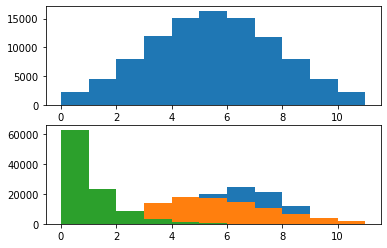

In [3]:
#60% of people who purchase sports cars are men.  If 10 sports car owners are randomly selected

import math
import random
from bisect import bisect
from random import random


#number of cars bought
n=10
#Probability of event happening
p=0.6
#
sqrt=math.sqrt
bins=11
pi=math.pi
stdev=2.5
mean=5
datasize=100000
Beta=1
Mu=0
rangemin=2
rangemax=5
#0-10 men(11 data points)
x=[0]*(n+1)
P=[0]*(n+1)
#The below probabilities are not needed, I could chose to plot one of the functions (shown below) but i chose to plot all in my output to show all the results
P1=[0]*(n+1)
P2=[0]*(n+1)
P3=[0]*(n+1)
y=[0]*(datasize+1)
#The same applies for the y values just like for the P values
y1=[0]*(datasize+1)
y2=[0]*(datasize+1)
y3=[0]*(datasize+1)



def weighted_choice(choices):
    values, weights = zip(*choices)
    total = 0
    cum_weights = []
    for w in weights:
        total += w
        cum_weights.append(total)
    X = random() * total
    i = bisect(cum_weights, X)
    return values[i]

#Defining the function

def gaussian(stdv,mean,x):
  P=(1/(sqrt(2*(stdv**2)*pi)))*(math.exp((-0.5*(x-mean)**2)/(stdv**2))) 
  return P

def binomial(n,p,x):
  q=1-p
  P=((math.factorial(n))/((math.factorial(n-x))*math.factorial(x)))*(p**x)*(q**(n-x))
  return P

def poisson(mean, x):
  P=((mean**x)*(math.exp(-2.5)))/(math.factorial(x))
  return P

def exponential(Beta, Mu, x):
  if Mu>x:
    return "error: Mu must be smaller or equal than x"
  if Beta<=0:
    return "error: Beta must be larger than zero"
  P=(1/Beta)*math.exp(-(x-Mu)/Beta)
  return P

def sum(rangemin,rangemax):
  Ptot=0
  k=0
  for k in range(rangemin,rangemax+1):#otherwise rangemax is skipped
    Ptot=Ptot+gaussian(stdev,mean,x[k])
    #Ptot=Ptot+binomial(n,p,x[k])
    #Ptot=Ptot+poisson(mean,x[i])
    #Ptot=Ptot+exponential(Beta, Mu, x[i])
    k=k+1
  return Ptot

i=0
for i in range(n+1):
  x[i]=i
  P[i]=gaussian(stdev,mean,x[i])
  #P[i]=binomial(n,p,x[i])
  #P[i]=poisson(mean,x[i])
  #P[i]=exponential(Beta, Mu, x[i])

  P1[i]=binomial(n,p,x[i])
  P2[i]=poisson(mean,x[i])
  P3[i]=exponential(Beta, Mu, x[i])
  

  i=i+ 1

j=0
for j in range(datasize+1):
    y[j]=weighted_choice([(x[0],P[0]), (x[1],P[1]), (x[2],P[2]), (x[3],P[3]), (x[4],P[4]), (x[5],P[5]), (x[6],P[6]), (x[7],P[7]), (x[8],P[8]), (x[9],P[9]), (x[10],P[10])])
    #the bottom are not needed but as i want to show all my graphs in the output i copied for all functions
    y1[j]=weighted_choice([(x[0],P1[0]), (x[1],P1[1]), (x[2],P1[2]), (x[3],P1[3]), (x[4],P1[4]), (x[5],P1[5]), (x[6],P1[6]), (x[7],P1[7]), (x[8],P1[8]), (x[9],P1[9]), (x[10],P1[10])])
    y2[j]=weighted_choice([(x[0],P2[0]), (x[1],P2[1]), (x[2],P2[2]), (x[3],P2[3]), (x[4],P2[4]), (x[5],P2[5]), (x[6],P2[6]), (x[7],P2[7]), (x[8],P2[8]), (x[9],P2[9]), (x[10],P2[10])])
    y3[j]=weighted_choice([(x[0],P3[0]), (x[1],P3[1]), (x[2],P3[2]), (x[3],P3[3]), (x[4],P3[4]), (x[5],P3[5]), (x[6],P3[6]), (x[7],P3[7]), (x[8],P3[8]), (x[9],P3[9]), (x[10],P3[10])])


Psum=sum(rangemin,rangemax)
print(P)
print("The sum of the probability function between " + str(rangemin) + " and " + str(rangemax) + " is: " + str(Psum))

fig = plt.figure()
pl = fig.add_subplot(2, 1, 1)
pl1 = fig.add_subplot(2, 1, 2)
pl2 = fig.add_subplot(2, 1, 2)
pl3 = fig.add_subplot(2, 1, 2)

pl.hist(y,bins, range=[0, 11])
pl1.hist(y1,bins, range=[0, 11])
pl2.hist(y2,bins, range=[0, 11])
pl3.hist(y3,bins, range=[0, 11])


